In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib 
import matplotlib.pyplot as plt 

%matplotlib inline

In [9]:
df = pd.read_csv('/Users/dilyshuynh/Downloads/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv', encoding='windows-1252')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
df.shape

(11251, 15)

In [12]:
#Drop blank conlumns 
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [19]:
# Check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
#Drop null values
df.dropna(inplace = True)

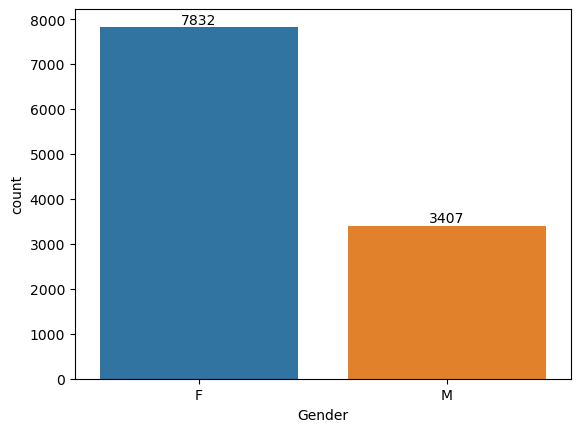

In [24]:
# Showing the number of each gender 
ax = sns.countplot(x = df['Gender'], data = df)

for bar in ax.containers: 
    ax.bar_label(bar)

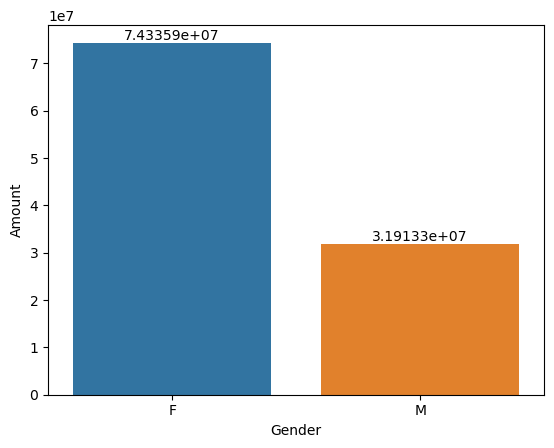

In [33]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum()

ax = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
for bar in ax.containers: 
    ax.bar_label(bar) 

In [35]:
#From above bar plot, we can see that the most of buyers are females

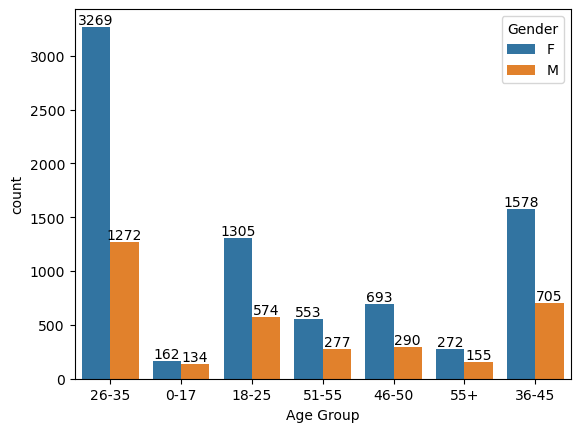

In [41]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

for bar in ax.containers: 
    ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

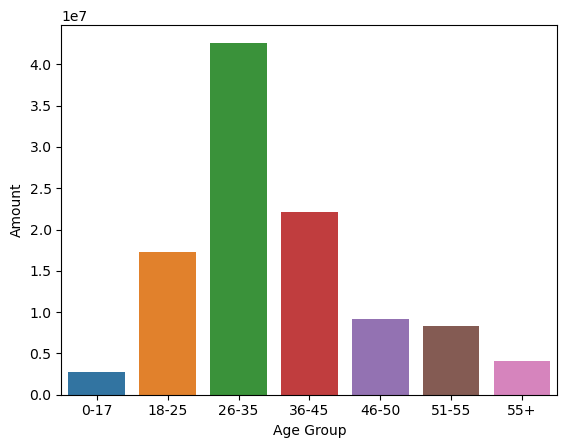

In [53]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum()

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

In [ ]:
# From the plot aboave, we can see that the most buyers are in the range age from 26 to 35 years old

<Axes: xlabel='State', ylabel='Orders'>

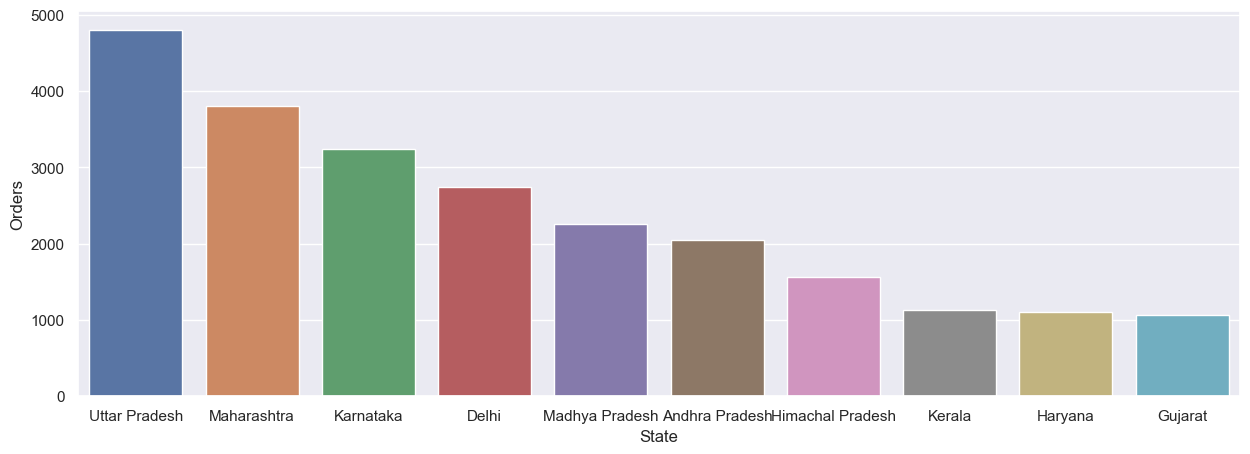

In [67]:
# Shows the total number of order from top 10 States

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (15,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

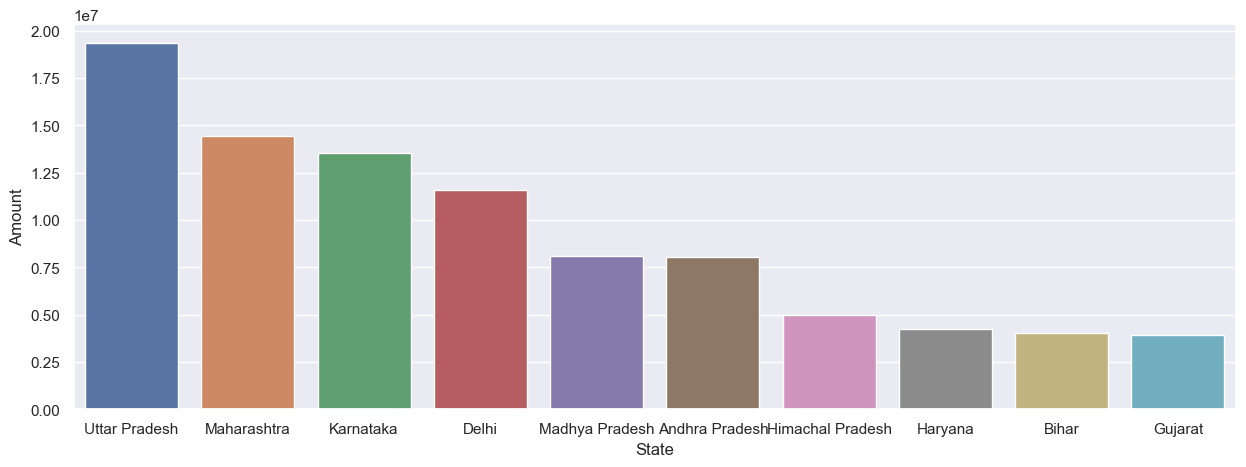

In [68]:
# Show the amount of sales from top 10 States
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (15,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)


In [69]:
# From above plot, we can see that most of orders and total number of sales are from Uttar Pradesh, Maharashtra, Karnataka and Delhi respectively

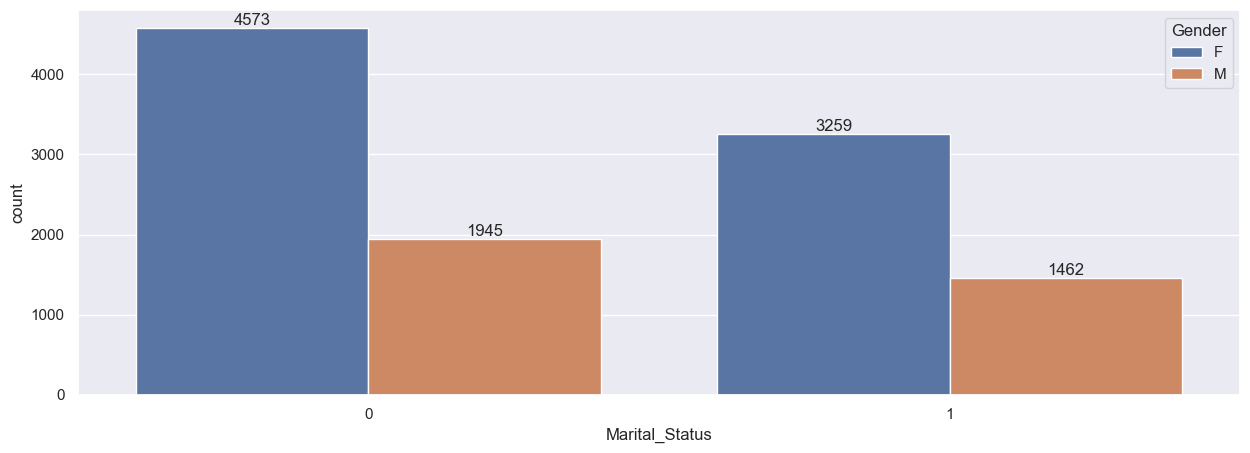

In [73]:
ax = sns.countplot(x = 'Marital_Status', hue = 'Gender', data = df)

for bar in ax.containers: 
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

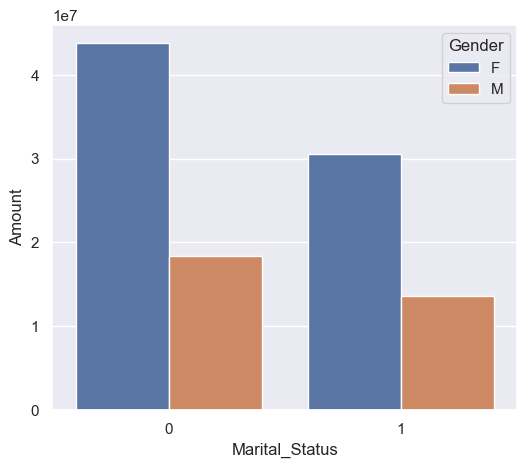

In [86]:
sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum()

sns.set(rc = {'figure.figsize' : (6,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_marital)

In [83]:
# From the plot above, we can clearly see the most of buyers are married women and they have high purchaing power

<Axes: xlabel='Occupation', ylabel='Amount'>

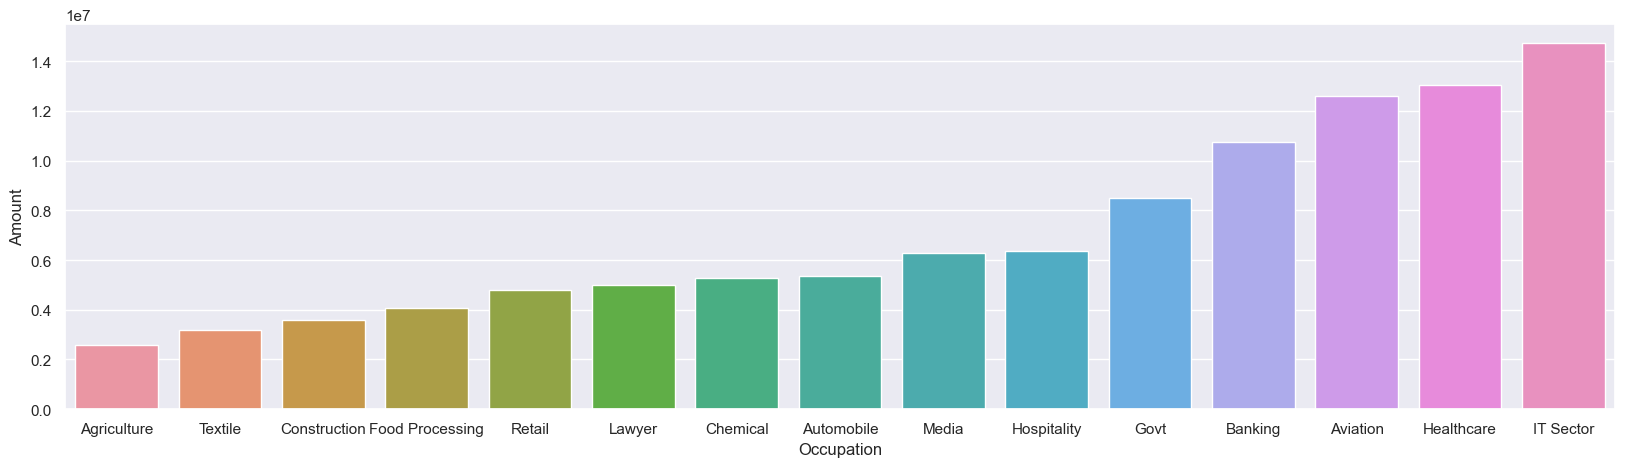

In [93]:
sales_job = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount')
sales_job

sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(x = 'Occupation', y ='Amount', data = sales_job)

In [94]:
# Based on the plot, we can see that most of purchasers are people who work in IT, Healthcare, Aviation fields 

<Axes: xlabel='Product_Category', ylabel='Amount'>

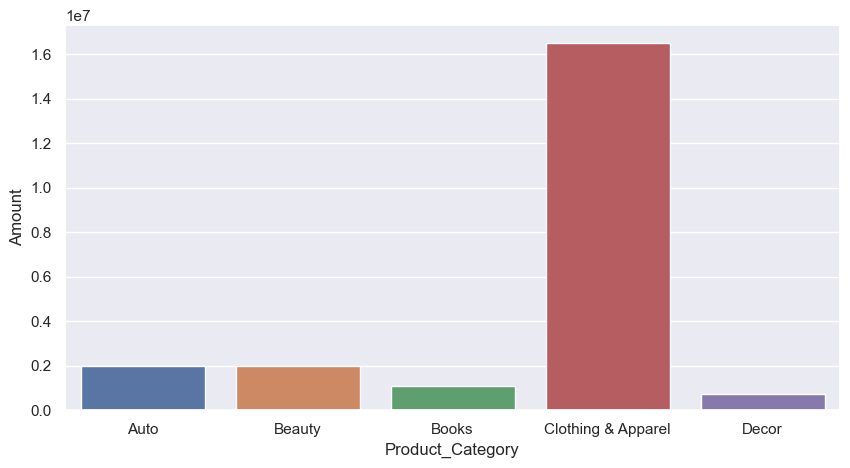

In [101]:
# Showing top 5 Categories that sold most
sales_categories = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().head(5)

sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_categories)

In [102]:
# From the plot, we can see that the most of sold categories is clothing and apparel